In [93]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [94]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[3842, 3246, 776, 1194, 4264, 3334, 706, 526, 422, 798, 154, 488, 1476, 784, 1658, 3480]
Made EGreedy
[4098, 1776, 476, 1642, 6580, 2708, 798, 106, 1900, 1322, 2776, 432, 2456, 696, 2048]
Made EGreedy
[926, 626, 1886, 932, 974, 758, 758, 342, 752, 412, 1778, 630, 1208, 2012, 1400, 2236]
Made EGreedy
[1232, 2338, 1434, 1280, 1408, 2528, 1438, 1562, 812, 1446, 2292, 1428, 444, 786, 2120, 316]
Made EGreedy
[2844, 1322, 2176, 1078, 4496, 538, 1736, 704, 780, 956, 2628, 2266, 1356, 892, 502, 2130]
Made EGreedy
[1134, 628, 1032, 532, 1358, 430, 1706, 574, 428, 692, 1850, 1112, 1830, 1884, 786, 424]
Made EGreedy
[1380, 150, 754, 888, 1070, 2162, 584, 776, 1314, 228, 1692, 1902, 366, 2084, 318, 1134]
Made EGreedy
[174, 2380, 856, 648, 442, 3552, 3402, 712, 702, 2132, 520, 472, 302, 920, 664, 340]
Made EGreedy
[1772, 1650, 1646, 746, 476, 742, 2324, 2394, 1594, 646, 1744, 578, 512, 292, 804, 2042]
Made EGreedy
[748, 422, 296, 1820, 3028,

(0.0, 5000.0)

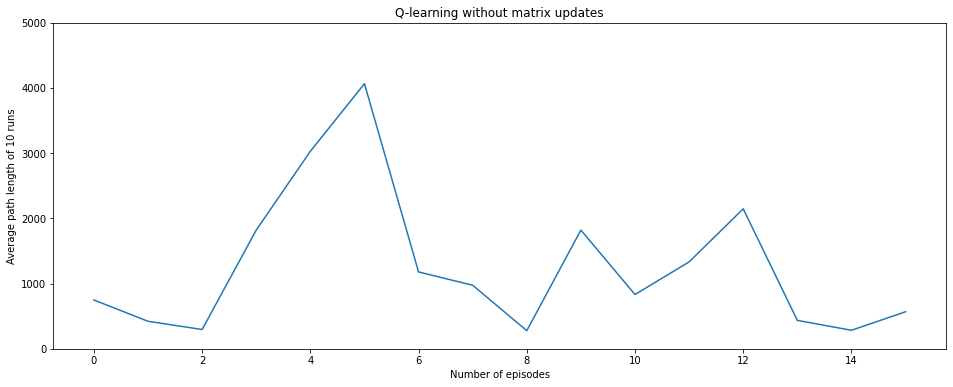

In [95]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning without matrix updates")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(206, 0), (780, 0), (1388, 0), (1492, 0), (650, 0), (2806, 0), (530, 0), (372, 0), (718, 0), (484, 0), (256, 0), (138, 0), (174, 0), (78, 0), (64, 0), (86, 0), (356, 0), (330, 0), (80, 0), (68, 0), (52, 0), (30, 0), (40, 0), (40, 0), (118, 0), (30, 0), (28, 0), (28, 0), (28, 0), (28, 0), (42, 0), (24, 0), (26, 0), (26, 0), (24, 0), (28, 0), (24, 0), (26, 0), (24, 0), (28, 0)]
Made EGreedy
[(574, 0), (714, 0), (370, 0), (636, 0), (368, 0), (308, 0), (492, 0), (800, 0), (470, 0), (688, 0), (1380, 0), (330, 0), (510, 0), (160, 0), (96, 0), (160, 0), (434, 0), (378, 0), (304, 0), (78, 0), (138, 0), (170, 0), (38, 0), (74, 0), (44, 0), (34, 0), (32, 0), (26, 0), (24, 0), (26, 0), (28, 0), (28, 0), (28, 0), (26, 0), (28, 0), (34, 0), (26, 0), (24, 0), (30, 0), (24, 0)]
Made EGreedy
[(1504, 0), (1604, 0), (1082, 0), (516, 0), (1020, 0), (748, 0), (1942, 0), (780, 0), (422, 0), (170, 0), (84, 0), (242, 0), (116, 0), (94, 0), (164, 0), 

(0.0, 2000.0)

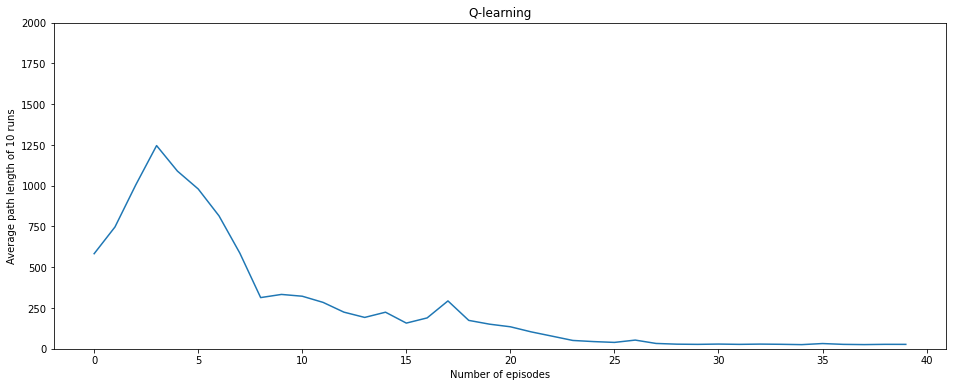

In [96]:
#1.5 and 1.6

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 2000)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(632, 0), (188, 0), (640, 0), (322, 0), (54, 0), (550, 0), (950, 0), (552, 0), (500, 0), (424, 0), (146, 0), (156, 0), (324, 0), (158, 0), (128, 0), (140, 0), (114, 0), (200, 0), (164, 0), (100, 0), (384, 0), (150, 0), (326, 0), (88, 0), (70, 0), (264, 0), (172, 0), (30, 0), (76, 0), (84, 0), (26, 0), (60, 0), (28, 0), (28, 0), (26, 0), (26, 0), (26, 0), (26, 0), (26, 0), (26, 0)]
Made EGreedy
[(380, 0), (1398, 0), (1150, 0), (294, 0), (1330, 0), (964, 0), (2490, 0), (568, 0), (146, 0), (298, 0), (158, 0), (108, 0), (76, 0), (126, 0), (184, 0), (72, 0), (120, 0), (40, 0), (52, 0), (58, 0), (112, 0), (58, 0), (72, 0), (26, 0), (28, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0), (26, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0), (24, 0), (24, 0), (26, 0), (24, 0)]
Made EGreedy
[(1706, 0), (3176, 0), (264, 0), (706, 0), (278, 0), (118, 0), (1802, 0), (374, 0), (190, 0), (330, 0), (548, 0), (118, 0), (136, 0), (410, 0), (146, 

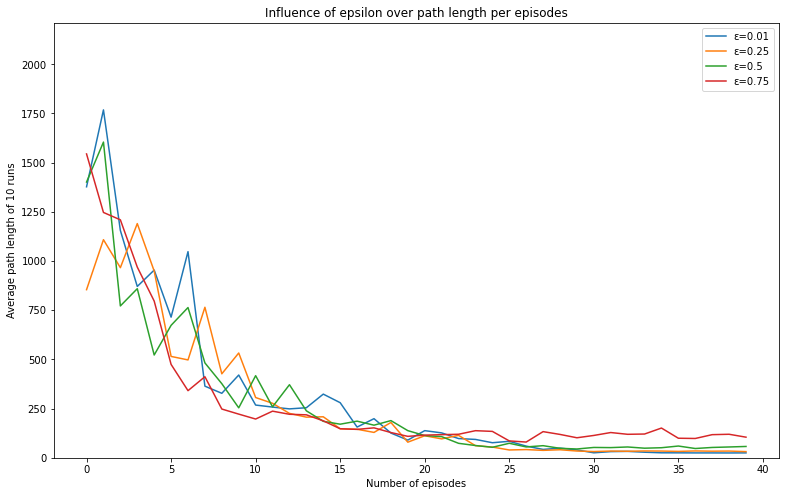

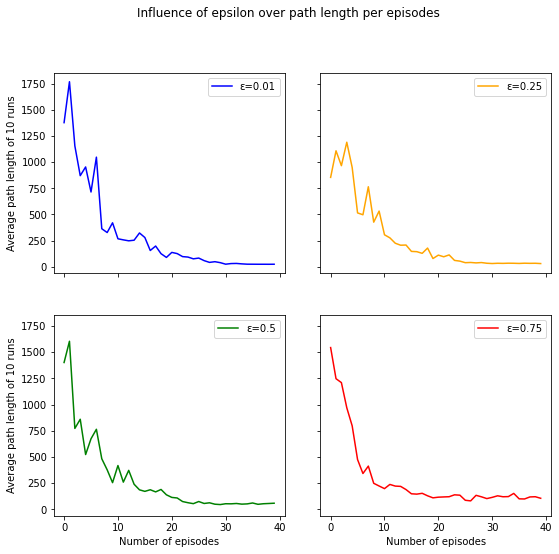

In [97]:
#1.7

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
epsilons = [0.01, 0.25, 0.5, 0.75]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of epsilon over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))
for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, max_y)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(548, 0), (1240, 0), (2120, 0), (946, 0), (1740, 0), (170, 0), (608, 0), (238, 0), (552, 0), (224, 0), (210, 0), (154, 0), (364, 0), (134, 0), (180, 0), (616, 0), (202, 0), (146, 0), (466, 0), (90, 0), (102, 0), (60, 0), (46, 0), (144, 0), (24, 0), (38, 0), (32, 0), (30, 0), (28, 0), (24, 0), (30, 0), (26, 0), (24, 0), (26, 0), (24, 0), (32, 0), (52, 0), (24, 0), (28, 0), (32, 0)]
Made EGreedy
[(2190, 0), (3860, 0), (592, 0), (1340, 0), (432, 0), (402, 0), (554, 0), (126, 0), (132, 0), (382, 0), (220, 0), (220, 0), (96, 0), (98, 0), (202, 0), (124, 0), (210, 0), (396, 0), (152, 0), (332, 0), (138, 0), (276, 0), (194, 0), (66, 0), (138, 0), (120, 0), (124, 0), (38, 0), (38, 0), (78, 0), (36, 0), (26, 0), (30, 0), (28, 0), (32, 0), (28, 0), (30, 0), (38, 0), (28, 0), (42, 0)]
Made EGreedy
[(494, 0), (2242, 0), (2784, 0), (192, 0), (488, 0), (536, 0), (368, 0), (488, 0), (758, 0), (414, 0), (92, 0), (492, 0), (476, 0), (208, 0), (

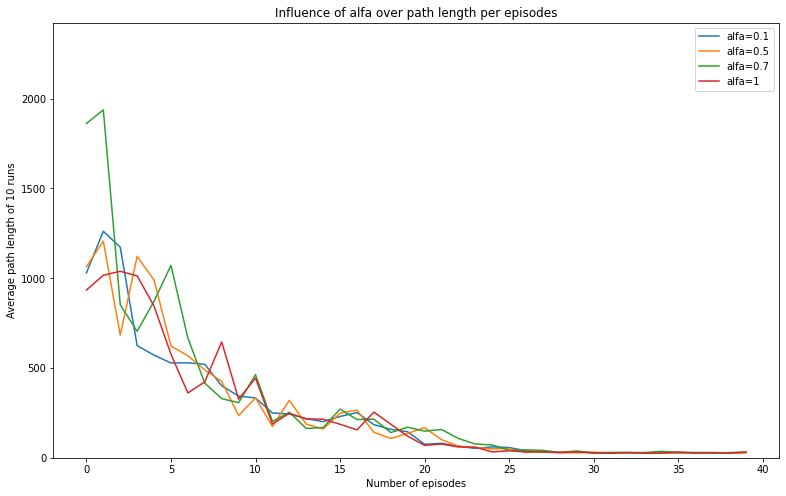

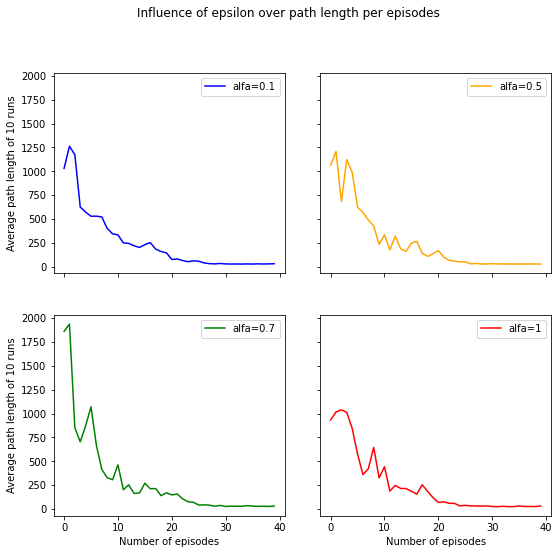

In [101]:
#1.9

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfas = [0.1, 0.5, 0.7, 1]
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for ind, alfa in enumerate(alfas):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of alfa over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(250, 0), (369, 1), (1105, 1), (407, 1), (1117, 1), (1037, 1), (639, 1), (469, 1), (333, 1), (129, 1), (455, 1), (91, 1), (177, 1), (131, 1), (375, 1), (155, 1), (123, 1), (87, 1), (117, 1), (95, 1), (41, 1), (41, 1), (23, 1), (23, 1), (27, 1), (23, 1), (23, 1), (71, 1), (29, 1), (29, 1), (47, 1), (21, 1), (27, 1), (21, 1), (23, 1), (25, 1), (23, 1), (25, 1), (23, 1), (25, 1), (21, 1), (21, 1), (31, 1), (21, 1), (25, 1), (23, 1), (21, 1), (25, 1), (21, 1), (21, 1), (23, 1), (33, 1), (23, 1), (25, 1), (25, 1), (21, 1), (25, 1), (25, 1), (21, 1), (27, 1), (29, 1), (21, 1), (25, 1), (25, 1), (23, 1), (21, 1), (23, 1), (21, 1), (29, 1), (27, 1), (23, 1), (23, 1), (21, 1), (25, 1), (25, 1), (23, 1), (25, 1), (25, 1), (21, 1), (25, 1), (25, 1), (21, 1), (21, 1), (25, 1), (21, 1), (27, 1), (27, 1), (23, 1), (27, 1), (21, 1), (25, 1), (27, 1), (23, 1), (23, 1), (25, 1), (21, 1), (27, 1), (27, 1), (23, 1), (21, 1), (21, 1), (23, 1), (23

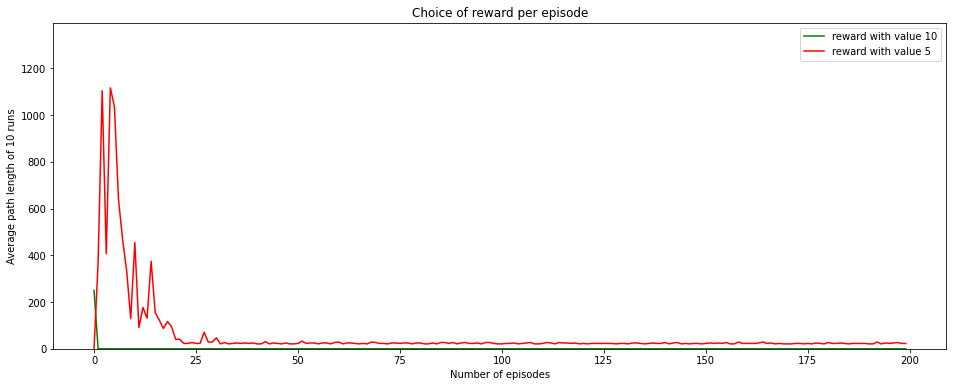

In [99]:
#1.3.10
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
#maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 4
start_eps = 0.1


for runNumber in range(1):
    res = main_algo(alfa=alfa, gamma=gamma, eps=start_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)

print(max_y)
plt.figure(figsize=(16,6))
plt.title("Choice of reward per episode")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


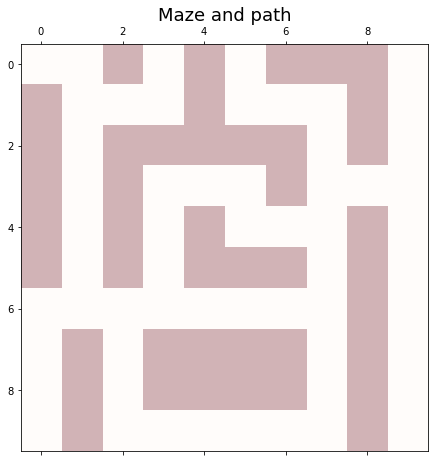

Made EGreedy
[(1322, 0), (303, 1), (337, 1), (364, 0), (1835, 1), (1249, 1), (1139, 1), (221, 1), (814, 0), (318, 0), (654, 0), (325, 1), (425, 1), (260, 0), (279, 1), (217, 1), (224, 0), (642, 0), (245, 1), (229, 1), (288, 0), (383, 1), (232, 0), (257, 1), (195, 1), (138, 0), (127, 1), (269, 1), (162, 0), (279, 1), (158, 0), (111, 1), (331, 1), (59, 1), (212, 0), (149, 1), (356, 0), (40, 0), (91, 1), (156, 0), (93, 1), (166, 0), (69, 1), (189, 1), (128, 0), (244, 0), (250, 0), (76, 0), (95, 1), (208, 0), (76, 0), (162, 0), (202, 0), (135, 1), (128, 0), (94, 0), (58, 0), (156, 0), (66, 0), (102, 0), (201, 1), (166, 0), (142, 0), (67, 1), (62, 0), (95, 1), (150, 0), (128, 0), (52, 0), (100, 0), (69, 1), (86, 0), (88, 0), (78, 0), (106, 0), (150, 0), (54, 0), (129, 1), (100, 0), (71, 1), (104, 0), (45, 1), (78, 0), (40, 0), (88, 0), (116, 0), (192, 0), (37, 1), (108, 0), (106, 0), (54, 0), (74, 0), (52, 0), (110, 0), (52, 0), (76, 0), (38, 0), (55, 1), (46, 0), (46, 0), (88, 0), (78, 0),

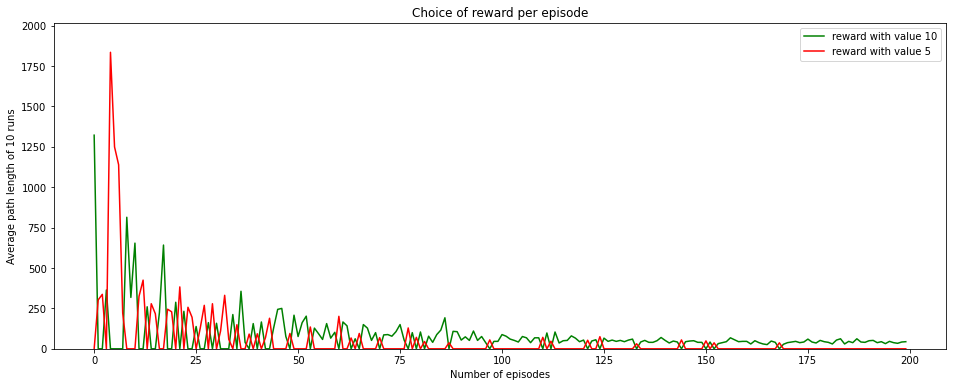

In [100]:
#1.3.11
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995


for runNumber in range(1):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.1)

print(max_y)

plt.figure(figsize=(16,6))
plt.title("Choice of reward per episode")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()